# 1. Data Exploration and Preprocessing:
- Perform exploratory data analysis to understand the distribution and relationships between different variables. 
- Handle missing or inconsistent data and normalize or scale numerical features where necessary (e.g., Temperature, Pressure, Vibration). 
- Convert categorical variables, such as Maintenance History, into numerical representations. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('DS-predictive-maintenance-data.csv')
data.head()

,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,6/1/2023 11:59,55.57,146.26,4.12,16540,Yes,No
1,5b36c9d4-ec3a-4459-a408-461563caa1db,3/5/2023 3:35,87.08,459.80,2.92,3199,No,Yes
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,5/25/2023 6:33,62.24,176.03,3.84,3989,No,No
3,c8437f2d-a812-447c-88fb-6abe325fde5b,12/30/2022 8:03,56.98,117.75,0.96,3797,No,No
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,12/14/2022 17:22,55.12,274.42,2.64,4054,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine ID           363 non-null    object 
 1   Timestamp            363 non-null    object 
 2   Temperature          363 non-null    float64
 3   Pressure             363 non-null    float64
 4   Vibration            363 non-null    float64
 5   Operational Hours    363 non-null    int64  
 6   Maintenance History  363 non-null    object 
 7   Failure              363 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 22.8+ KB


In [4]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Machine ID             0
Timestamp              0
Temperature            0
Pressure               0
Vibration              0
Operational Hours      0
Maintenance History    0
Failure                0
dtype: int64


In [5]:
# Fill missing values (if any), here we're filling with mean for numerical columns as an example
data.fillna(data.mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_12012/3865100419.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [6]:
# Convert categorical 'Maintenance History' and 'Failure' to numerical
data['Maintenance History'] = data['Maintenance History'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Failure'] = data['Failure'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the result
data.head()

,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure
0,e0d1202e-ada0-4f29-9972-e57008e11d70,6/1/2023 11:59,55.57,146.26,4.12,16540,1,0
1,5b36c9d4-ec3a-4459-a408-461563caa1db,3/5/2023 3:35,87.08,459.80,2.92,3199,0,1
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,5/25/2023 6:33,62.24,176.03,3.84,3989,0,0
3,c8437f2d-a812-447c-88fb-6abe325fde5b,12/30/2022 8:03,56.98,117.75,0.96,3797,0,0
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,12/14/2022 17:22,55.12,274.42,2.64,4054,1,1


# 2. Feature Engineering:
- Create new features that might help in predicting failures, such as the average operating temperature, pressure fluctuations, or the total vibration over time.
- Investigate the time-series nature of the data to detect trends and patterns that could lead to equipment failure. 

In [7]:
# Create new features such as moving averages or differences
data['Avg_Temperature'] = data['Temperature'].rolling(window=5).mean()
data['Pressure_Diff'] = data['Pressure'].diff()

# Fill NaN values created by rolling and diff
data.fillna(0, inplace=True)

# Check new features
data.head()

,Machine ID,Timestamp,Temperature,Pressure,Vibration,Operational Hours,Maintenance History,Failure,Avg_Temperature,Pressure_Diff
0,e0d1202e-ada0-4f29-9972-e57008e11d70,6/1/2023 11:59,55.57,146.26,4.12,16540,1,0,0.000,0.00
1,5b36c9d4-ec3a-4459-a408-461563caa1db,3/5/2023 3:35,87.08,459.80,2.92,3199,0,1,0.000,313.54
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,5/25/2023 6:33,62.24,176.03,3.84,3989,0,0,0.000,-283.77
3,c8437f2d-a812-447c-88fb-6abe325fde5b,12/30/2022 8:03,56.98,117.75,0.96,3797,0,0,0.000,-58.28
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,12/14/2022 17:22,55.12,274.42,2.64,4054,1,1,63.398,156.67


# 3. Model Development:
- Split the dataset into training and testing sets.
- Develop a predictive model using algorithms like Random Forest, Support Vector Machine, or Gradient Boosting.
- Fine-tune the model using cross-validation and evaluate its performance using metrics like accuracy, precision, recall, and the F1-score.

In [14]:
# Features (X) and target (y)
X = data[['Temperature', 'Pressure', 'Vibration', 'Operational Hours', 'Maintenance History', 'Avg_Temperature', 
          'Pressure_Diff']]
y = data['Failure']

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [10]:
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.41

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.46      0.38        28
           1       0.53      0.38      0.44        45

    accuracy                           0.41        73
   macro avg       0.42      0.42      0.41        73
weighted avg       0.45      0.41      0.42        73



# 4. Predictive Maintenance Strategy: 
- Based on the model's predictions, design a maintenance strategy that includes scheduling maintenance before failures are likely to occur.
- Suggest the optimal maintenance intervals and any additional measures the company should take to prevent unexpected failures. 

In [11]:
# If the model predicts failure (1), suggest scheduling maintenance
data['Predicted Failure'] = model.predict(X)

# Suggest maintenance if failure is predicted
data['Maintenance Suggestion'] = data['Predicted Failure'].apply(lambda x: 'Schedule Maintenance' if x == 1 else 'No Maintenance Needed')

# Preview maintenance suggestions
data[['Machine ID', 'Predicted Failure', 'Maintenance Suggestion']].head()

,Machine ID,Predicted Failure,Maintenance Suggestion
0,e0d1202e-ada0-4f29-9972-e57008e11d70,0,No Maintenance Needed
1,5b36c9d4-ec3a-4459-a408-461563caa1db,1,Schedule Maintenance
2,8a8f478c-bea8-4b9b-a8c0-004cb8034c72,0,No Maintenance Needed
3,c8437f2d-a812-447c-88fb-6abe325fde5b,1,Schedule Maintenance
4,fe8b5529-e3d3-408a-bff6-5b2fbe37393a,1,Schedule Maintenance


# 5. Visualization:
- Create visualizations that show the relationship between the machine's operational parameters and its likelihood of failure. 

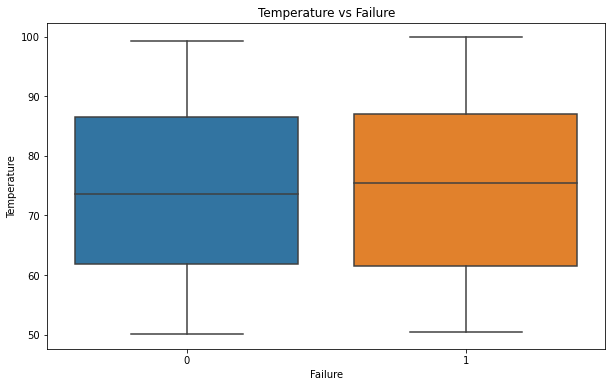

In [12]:
# Plotting the relationship between Temperature and Failure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure', y='Temperature', data=data)
plt.title('Temperature vs Failure')
plt.show()

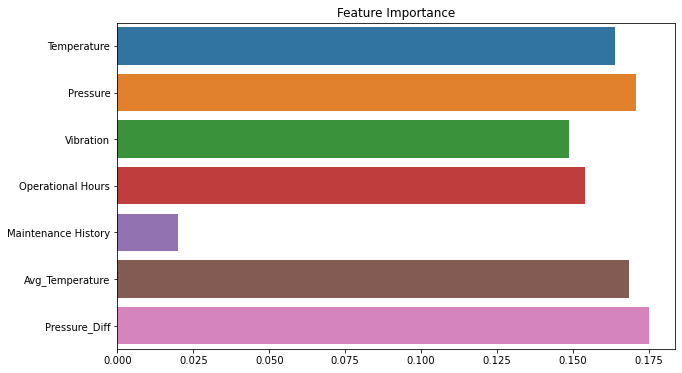

In [13]:
# Visualizing the importance of features in the Random Forest model
importances = model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()